# BEORN coupled to 21cmFast

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import beorn
import tools21cm as t2c

## Define parameters
beorn contains a parameter object `beorn.par()` conatining the default parameter values. This object is essential for most of the beorn simulation functions/classes.

In [3]:
param = beorn.par()

### Cosmology

In [4]:
# cosmology
param.cosmo.Om = 0.31
param.cosmo.Ob = 0.045
param.cosmo.Ol = 0.69
param.cosmo.h  = 0.68
param.cosmo.ps = '../../examples/PCDM_Planck.dat'
param.cosmo.corr_fct = '../../examples/corr_fct.dat'

### Source parameters

In [5]:
# lyman-alpha photons
param.source.N_al = 9690#1500
param.source.alS_lyal = 0.0

# ionising photons
param.source.Nion = 3000     #5000

# X-ray photons
param.source.E_min_xray = 500
param.source.E_max_xray = 10000
param.source.E_min_sed_xray = 200
param.source.E_max_sed_xray = 10000
param.source.alS_xray =  1.5
param.source.cX = 3.4e40

# photon escape fraction
param.source.f0_esc = 0.2
param.source.pl_esc = 0.5

# stellar-to-halo
param.source.f_st = 0.14
param.source.g1 = 0.49
param.source.g2 = -0.61
param.source.g3 = 4
param.source.g4= -4
param.source.Mp= 1.6e11 * param.cosmo.h
param.source.Mt= 1e9

# Minimum star forming halo
param.source.M_min= 1e8

### Simulation parameters

In [6]:
# sim
param.sim.M_i_min = 3e1 * np.exp(0.79*(25-40))
param.sim.M_i_max = 8e7 * np.exp(0.79*(25-40))
param.sim.model_name = 'py21cmfast_test'
param.sim.cores = 1  # nbr of cores to use
param.sim.binn  = 40  # nbr of halo mass bin

# Box size and Number of pixels
param.sim.Lbox  = 100
param.sim.Ncell = 128
param.sim.halo_catalogs = None
param.sim.thresh_pixel  = 20*(param.sim.Ncell/128)**3
param.sim.dens_fields   = None
param.sim.dens_field_type = '21cmfast'
param.sim.data_dir        = '../../examples/py21cmfast_test'
param.sim.store_grids = False #True #'replace' # True # False

# bubble expansion solver
param.solver.z_ini = 40
param.solver.z_end = 6
param.solver.Nz    = 200

## Simulate matter evolution
beorn can either use density snapshots and halo catalogues from any N-body simulation or run a simulation code that it is coupled to. Here an example of running 21cmFast to model matter evolution is shown.

In [7]:
redshift = 8.0
matter_field = beorn.simulate_matter_21cmfast(redshift, param, IC=None)

Simulating matter evolution with 21cmFast...


The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']


...done | Runtime = 0:00:08.086417


## Simulating reionization and cosmic dawn

The results from `21cmFast` is defined in the parameter object. 

In [8]:
param.sim.dens_fields   = [matter_field['dens']]
param.sim.halo_catalogs = [matter_field['halo_list']]

As `beorn` is coupled to `21cmFast`, one can also directly run `beorn.run_coeval_EOR_CD` that will simulate both the matter evolution and reionization/cosmic-dawn, without the need of manually passing the results to the parameter object.

In [9]:
beorn.initialise_run(param)
profiles = beorn.model_profiles(param, method='simple')
grid_outputs = beorn.paint_profiles(param, profiles=profiles)

Profiles loaded from ../../examples/py21cmfast_test/profiles/py21cmfast_test_zi_40.000.pkl
Painting profiles on a grid with 128 pixels per dim. Box size is 100 cMpc/h.
----- Painting for redshift = 8.000 -------
8.0 [ 0.       0.       0.      ... 99.21875  0.       0.     ]
There are 151219 halos at z = 8.000
Quick calculation from the profiles predicts xHII =  0.1886
Mass bin 1/40 | n_haloes = 0, painting runtime = 0:00:00.108179
Mass bin 2/40 | n_haloes = 0, painting runtime = 0:00:00.108243
Mass bin 3/40 | n_haloes = 0, painting runtime = 0:00:00.108286
Mass bin 4/40 | n_haloes = 0, painting runtime = 0:00:00.108328
Mass bin 5/40 | n_haloes = 0, painting runtime = 0:00:00.108369
Mass bin 6/40 | n_haloes = 0, painting runtime = 0:00:00.108411
Mass bin 7/40 | n_haloes = 0, painting runtime = 0:00:00.108452
Mass bin 8/40 | n_haloes = 0, painting runtime = 0:00:00.108494
Mass bin 9/40 | n_haloes = 0, painting runtime = 0:00:00.108535
Mass bin 10/40 | n_haloes = 0, painting runtime = 0:

In [10]:
# dt = t2c.calc_dt(grid_outputs['{:.3f}'.format(redshift)]['ion'], 
#                  grid_outputs['{:.3f}'.format(redshift)]['dens'],
#                 redshift
#                 )

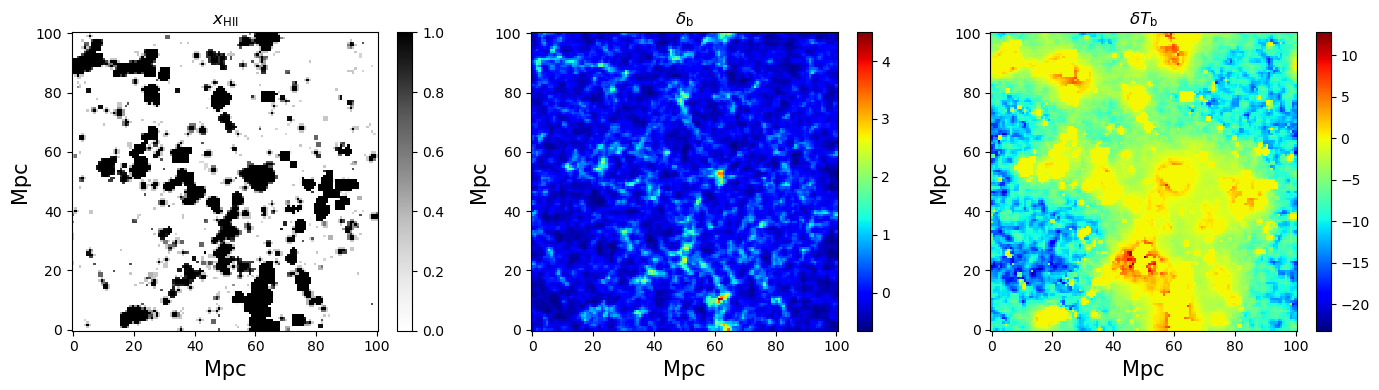

In [11]:
fig, axs = plt.subplots(1,3,figsize=(14,4))
ax, sl = axs[0], grid_outputs['{:.3f}'.format(redshift)]['ion'][1]
ax.set_title('$x_\mathrm{HII}$')
pm = ax.pcolormesh(np.linspace(0,param.sim.Lbox,sl.shape[0]), np.linspace(0,param.sim.Lbox,sl.shape[1]),
                sl, cmap='Greys')
fig.colorbar(pm, ax=ax)
ax, sl = axs[1], grid_outputs['{:.3f}'.format(redshift)]['dens'][1]
ax.set_title('$\delta_\mathrm{b}$') #ax.set_title('$T_\mathrm{k}$')
pm = ax.pcolormesh(np.linspace(0,param.sim.Lbox,sl.shape[0]), np.linspace(0,param.sim.Lbox,sl.shape[1]),
                sl, cmap='jet')
fig.colorbar(pm, ax=ax)
ax, sl = axs[2], grid_outputs['{:.3f}'.format(redshift)]['dTb'][1] #dt[1] #
ax.set_title('$\delta T_\mathrm{b}$')
pm = ax.pcolormesh(np.linspace(0,param.sim.Lbox,sl.shape[0]), np.linspace(0,param.sim.Lbox,sl.shape[1]),
                sl, cmap='jet')
fig.colorbar(pm, ax=ax)
for ax in axs.flatten():
    ax.set_xlabel('Mpc', fontsize=15)
    ax.set_ylabel('Mpc', fontsize=15)
plt.tight_layout()
plt.show()


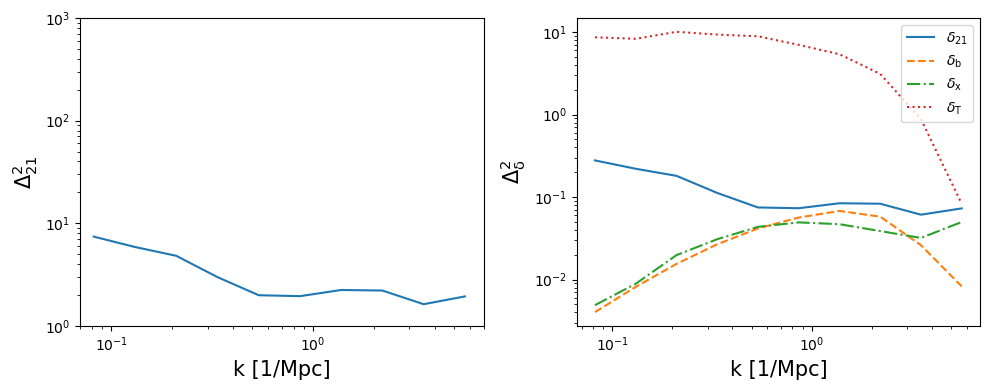

In [12]:
# Step 3 : Statitical measures
ps_dn, ks = t2c.power_spectrum_1d(grid_outputs['{:.3f}'.format(redshift)]['dens'], kbins=10, box_dims=param.sim.Lbox)
ps_in, ks = t2c.power_spectrum_1d(grid_outputs['{:.3f}'.format(redshift)]['ion'], kbins=10, box_dims=param.sim.Lbox)
ps_Tk, ks = t2c.power_spectrum_1d(grid_outputs['{:.3f}'.format(redshift)]['temp'], kbins=10, box_dims=param.sim.Lbox)
ps_dT, ks = t2c.power_spectrum_1d(grid_outputs['{:.3f}'.format(redshift)]['dTb'], kbins=10, box_dims=param.sim.Lbox)

fig, axs = plt.subplots(1,2,figsize=(10,4))
ax = axs[0]
ax.loglog(ks, ps_dT*ks**3/2/np.pi**2)
ax.set_ylabel('$\Delta^2_\mathrm{21}$', fontsize=15)
ax.axis([7e-2,7,1,1e3])
ax = axs[1]
ax.loglog(ks, ps_dT*ks**3/2/np.pi**2/grid_outputs['{:.3f}'.format(redshift)]['dTb'].mean()**2, label='$\delta_\mathrm{21}$')
ax.loglog(ks, ps_dn*ks**3/2/np.pi**2, ls='--', label='$\delta_\mathrm{b}$')
ax.loglog(ks, ps_in*ks**3/2/np.pi**2, ls='-.', label='$\delta_\mathrm{x}$')
ax.loglog(ks, ps_Tk*ks**3/2/np.pi**2, ls=':', label='$\delta_\mathrm{T}$')
ax.set_ylabel('$\Delta^2_\mathrm{\delta}$', fontsize=15)
ax.legend()
for ax in axs: ax.set_xlabel('k [1/Mpc]', fontsize=15)
plt.tight_layout()
plt.show()